In [15]:
from math import *
import numpy as np
from random import randint
import matplotlib.pyplot as plt

def conj(x):
    return x.real - x.imag*1j

## FFT basics

In [3]:
''' Fast fourier transform vectorized algorithm '''

def fft(X):
    N = len(X)
    n = int(log(N, 2))

    nodes = [2**(n - i) for i in range(0, n + 1)]
    values = [2**i for i in range(0, n + 1)]

    blocks = [[[] for j in range(N)] for i in range(n + 1)]

    blocks[0] = []
    for i in range(N):
        idx = 0
        for j in range(n):
            idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
        blocks[0].append(X[idx])

    for lvl in range(1, n + 1):
        for nd in range(nodes[lvl]):
            for v in range(values[lvl]):
                A = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1]]
                B = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1] + values[lvl - 1]]

                C = np.e ** (-2j * pi * v / values[lvl])

                blocks[lvl][values[lvl] * nd + v] = A + C * B
    return blocks[n]

In [5]:
''' Example with N = 8 '''
X = [2, 3, 4, 8, 7, 6, 5, 4]
N = len(X)

Xfft = fft(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fft(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[(4.875+0j), (-1.2437+0.0366j), 0.375j, (-0.0063-0.2134j), (-0.375+0j), (-0.0063+0.2134j), -0.375j, (-1.2437-0.0366j)]
[(2+0j), (3+0j), (4+0j), (8+0j), (7+0j), (6+0j), (5+0j), (4+0j)]


## FFT with coeficients calculated in advance

In [58]:
''' FFT vectorized with coeficients calculated in advance '''

def fftv(X):
    N = len(X)
    n = int(log(N, 2))
    lvls = n + 1

    nodes = [2**(n - i) for i in range(0, lvls)]
    values = [2**i for i in range(0, lvls)]

    Coef = [([np.e ** (-2j * pi * v / values[lvl]) for v in range(values[lvl])]) for lvl in range(lvls)]

    index0 = []
    for i in range(N):
        idx = 0
        for j in range(n):
            idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
        index0.append(idx)

    blocks = [[[] for j in range(N)] for i in range(lvls)]

    blocks[0] = []
    for i in range(N):
        blocks[0].append(X[index0[i]])
        
    # for i in range(N):
        # idx = 0
        # for j in range(n):
            # idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
        # blocks[0].append(X[idx])

    for lvl in range(1, lvls):
        for nd in range(nodes[lvl]):
            for v in range(values[lvl]):
                A = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1]]
                B = blocks[lvl - 1][values[lvl] * nd + v % values[lvl - 1] + values[lvl - 1]]

                C = Coef[lvl][v]
                # C = np.e ** (-2j * pi * v / values[lvl])

                blocks[lvl][values[lvl] * nd + v] = A + C * B
    return blocks[n]


In [59]:
''' Example of FFT vectorized with coeficients calculated in advance '''

X = [2, 3, 4, 8, 7, 6, 5, 4]
N = len(X)

Xfft = fftv(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fftv(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[(4.875+0j), (-1.2437+0.0366j), 0.375j, (-0.0063-0.2134j), (-0.375+0j), (-0.0063+0.2134j), -0.375j, (-1.2437-0.0366j)]
[(2+0j), (3+0j), (4+0j), (8+0j), (7+0j), (6+0j), (5+0j), (4+0j)]


In [13]:
''' Example with N = 16 '''
X = [randint(0, 10) for i in range(16)]
N = len(X)
print(X)

Xfft = fftv(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fftv(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[4, 4, 0, 3, 4, 3, 8, 3, 0, 2, 5, 8, 10, 1, 5, 2]
[(3.875+0j), (-0.2132+0.5649j), (-0.8018+0.1464j), (1.0317-0.5316j), 0.375j, (0.1754+0.0416j), (-0.4482-0.8536j), (0.0061-0.3619j), (0.625+0j), (0.0061+0.3619j), (-0.4482+0.8536j), (0.1754-0.0416j), -0.375j, (1.0317+0.5316j), (-0.8018-0.1464j), (-0.2132-0.5649j)]
[(4+0j), (4+0j), 0j, (3+0j), (4+0j), (3+0j), (8+0j), (3+0j), 0j, (2+0j), (5+0j), (8+0j), (10+0j), (1+0j), (5+0j), (2+0j)]


#### Indexing of FFT (level0)

In [64]:
''' indexing for N = 16 '''
N = 16
n = int(log(N, 2))
lvls = n + 1

index0 = []
for i in range(N):
    idx = 0
    for j in range(n):
        idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
    index0.append(idx)
        
print(index0)

[0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]


#### Coeficients of FFT for N = 16


In [66]:
''' Coeficients for N = 16 '''
N = 16
n = int(log(N, 2))
lvls = n + 1
# nodes = [16, 8, 4, 2, 1]
nodes = [2**(n - i) for i in range(0, lvls)]

# values = [1, 2, 4, 8, 16]
values = [2**i for i in range(0, lvls)]

coef = [([np.e ** (-2j * pi * v / values[lvl]) for v in range(values[lvl])]) for lvl in range(lvls)]


# coefSize = 16 + 8 + 4 + 2 + 1 = 2**(lvls) - 1
coefSize = 0
for i in range(lvls):
    coefSize += 2**i
print("size: ", coefSize)

print("real:")
for lvl in range(lvls):
    for v in range(values[lvl]):
        print (f"{coef[lvl][v].real:.15f},")
print("imag:")
for lvl in range(lvls):
    for v in range(values[lvl]):
        print (f"{coef[lvl][v].imag:.15f},")

# print("size: ", len(Coef[0]) * len(Coef[0][0]) * )

size:  31   31
real:
1.000000000000000,
1.000000000000000,
-1.000000000000000,
1.000000000000000,
0.000000000000000,
-1.000000000000000,
-0.000000000000000,
1.000000000000000,
0.707106781186548,
0.000000000000000,
-0.707106781186547,
-1.000000000000000,
-0.707106781186548,
-0.000000000000000,
0.707106781186547,
1.000000000000000,
0.923879532511287,
0.707106781186548,
0.382683432365090,
0.000000000000000,
-0.382683432365090,
-0.707106781186547,
-0.923879532511287,
-1.000000000000000,
-0.923879532511287,
-0.707106781186548,
-0.382683432365090,
-0.000000000000000,
0.382683432365090,
0.707106781186547,
0.923879532511287,
imag:
0.000000000000000,
0.000000000000000,
-0.000000000000000,
0.000000000000000,
-1.000000000000000,
-0.000000000000000,
1.000000000000000,
0.000000000000000,
-0.707106781186548,
-1.000000000000000,
-0.707106781186548,
-0.000000000000000,
0.707106781186547,
1.000000000000000,
0.707106781186548,
0.000000000000000,
-0.382683432365090,
-0.707106781186548,
-0.923879532511287

In [68]:
''' Indexing of coeficients for N = 16 '''
N = 16
n = int(log(N, 2))  # 4
lvls = n + 1        # 5
# nodes = [16, 8, 4, 2, 1]
nodes = [16, 8, 4, 2, 1]

# values = [1, 2, 4, 8, 16]
values = [1, 2, 4, 8, 16]
real = [
1.000000000000000,      # value 0, lvl 0
1.000000000000000,      # value 0, lvl 1
-1.000000000000000,     # value 1, lvl 1
1.000000000000000,      # value 0, lvl 2
0.000000000000000,      # value 1, lvl 2
-1.000000000000000,     # value 2, lvl 2
-0.000000000000000,     # value 3, lvl 2
1.000000000000000,      # value 0, lvl 3
0.707106781186548,      # value 1, lvl 3
0.000000000000000,      # value 2, lvl 3
-0.707106781186547,     # value 3, lvl 3
-1.000000000000000,     # value 4, lvl 3
-0.707106781186548,     # value 5, lvl 3
-0.000000000000000,     # value 6, lvl 3
0.707106781186547,      # value 7, lvl 3
1.000000000000000,      # value 0, lvl 4
0.923879532511287,      # value 1, lvl 4
0.707106781186548,      # value 2, lvl 4
0.382683432365090,      # value 3, lvl 4
0.000000000000000,      # value 4, lvl 4
-0.382683432365090,     # value 5, lvl 4
-0.707106781186547,     # value 6, lvl 4
-0.923879532511287,     # value 7, lvl 4
-1.000000000000000,     # value 8, lvl 4
-0.923879532511287,     # value 9, lvl 4
-0.707106781186548,     # value 10, lvl 4
-0.382683432365090,     # value 11, lvl 4
-0.000000000000000,     # value 12, lvl 4
0.382683432365090,      # value 13, lvl 4
0.707106781186547,      # value 14, lvl 4
0.923879532511287       # value 15, lvl 4
]
imag = [
0.000000000000000,      # value 0, lvl 0
0.000000000000000,      # value 0, lvl 1
-0.000000000000000,     # value 1, lvl 1
0.000000000000000,      # value 0, lvl 2
-1.000000000000000,     # value 1, lvl 2
-0.000000000000000,     # value 2, lvl 2
1.000000000000000,      # value 3, lvl 2
0.000000000000000,      # value 0, lvl 3
-0.707106781186548,     # value 1, lvl 3
-1.000000000000000,     # value 2, lvl 3
-0.707106781186548,     # value 3, lvl 3
-0.000000000000000,     # value 4, lvl 3
0.707106781186547,      # value 5, lvl 3
1.000000000000000,      # value 6, lvl 3
0.707106781186548,      # value 7, lvl 3
0.000000000000000,      # value 0, lvl 4
-0.382683432365090,     # value 1, lvl 4
-0.707106781186548,     # value 2, lvl 4
-0.923879532511287,     # value 3, lvl 4
-1.000000000000000,     # value 4, lvl 4
-0.923879532511287,     # value 5, lvl 4
-0.707106781186548,     # value 6, lvl 4
-0.382683432365090,     # value 7, lvl 4
-0.000000000000000,     # value 8, lvl 4
0.382683432365090,      # value 9, lvl 4
0.707106781186547,      # value 10, lvl 4
0.923879532511287,      # value 11, lvl 4
1.000000000000000,      # value 12, lvl 4
0.923879532511287,      # value 13, lvl 4
0.707106781186548,      # value 14, lvl 4
0.382683432365090       # value 15, lvl 4
]

''' 
lvl0 -> 0
lvl1 -> len(values[0]) = 1
lvl2 -> len(values[1]) = 2
lvl3 -> len(values[2]) = 4
lvl4 -> len(values[3]) = 8

[
    lvl0,                                   0
    lvl0 + lvl1,                            1
    lvl0 + lvl1 + lvl2,                     3
    lvl0 + lvl1 + lvl2 + lvl3,              7
    lvl0 + lvl1 + lvl2 + lvl3 + lvl4        15
]
'''
indexingStride = [0, 1, 3, 7, 15]

def eReal(v, lvl):
    return real[v + indexingStride[lvl]]

for lvl in range(lvls):
    for v in range(values[lvl]):
        print (f"{eReal(v, lvl):.15f},")


1.000000000000000,
1.000000000000000,
-1.000000000000000,
1.000000000000000,
0.000000000000000,
-1.000000000000000,
-0.000000000000000,
1.000000000000000,
0.707106781186548,
0.000000000000000,
-0.707106781186547,
-1.000000000000000,
-0.707106781186548,
-0.000000000000000,
0.707106781186547,
1.000000000000000,
0.923879532511287,
0.707106781186548,
0.382683432365090,
0.000000000000000,
-0.382683432365090,
-0.707106781186547,
-0.923879532511287,
-1.000000000000000,
-0.923879532511287,
-0.707106781186548,
-0.382683432365090,
-0.000000000000000,
0.382683432365090,
0.707106781186547,
0.923879532511287,


## FFT2D
implementation of fft in a tile

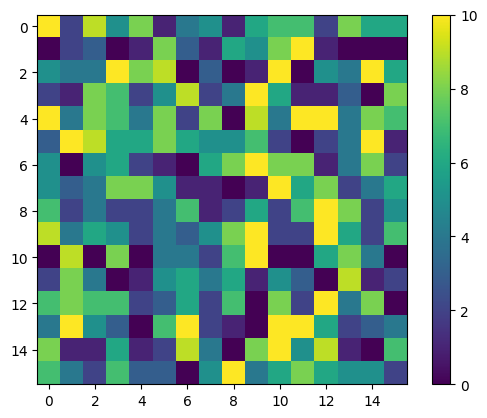

In [60]:
N = 16
img = [[randint(0, 10) for i in range(N)] for j in range(N)];

# Graficar la matriz
plt.imshow(img, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

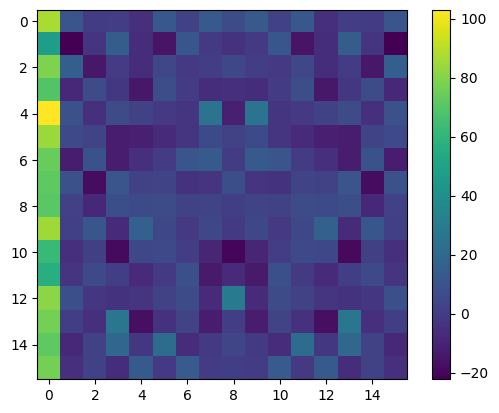

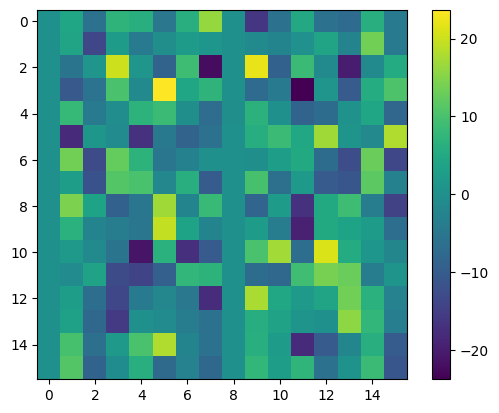

In [61]:
# print (img)
imgfp = img.copy()
for i in range(N):
    # print("img[i]:", img[i])
    linefft = fftv(img[i])
    # print(linefft)
    imgfp[i] = [linefft[j] for j in range(N)]
imgreal = [[imgfp[i][j].real for j in range(N)] for i in range(N)]
imgimag = [[imgfp[i][j].imag for j in range(N)] for i in range(N)]

# Graficar la matriz
plt.imshow(imgreal, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

plt.imshow(imgimag, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

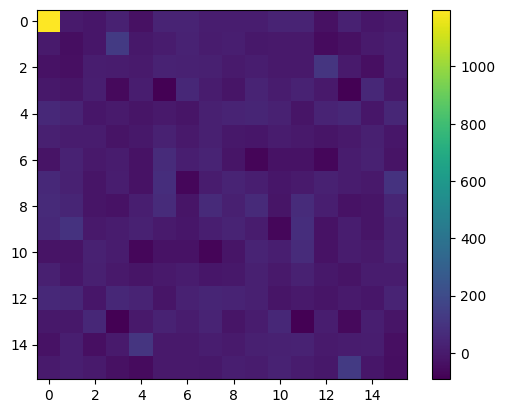

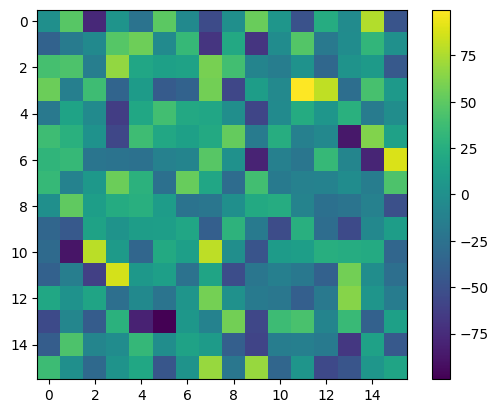

In [62]:
# print (img)
imgsp = img.copy()
for i in range(N):
    # print("img[i]:", img[i])
    linefft = fftv([imgfp[j][i] for j in range(N)])
    # print(linefft)
    for j in range(N):
        imgsp[j][i] = linefft[j]

imgreal = [[imgsp[i][j].real for j in range(N)] for i in range(N)]
imgimag = [[imgsp[i][j].imag for j in range(N)] for i in range(N)]

# Graficar la matriz
# plt.imshow(img, cmap='viridis', interpolation='nearest')
plt.imshow(imgreal, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

plt.imshow(imgimag, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Mostrar barra de color para la escala
plt.show()

## Faster FFT

In [93]:
def fftf(X):
    N = len(X)
    n = int(log(N, 2))
    lvls = n + 1

    nodes = [2**(n - i) for i in range(0, n + 1)]
    values = [2**i for i in range(0, n + 1)]
    
    Coef = [([np.e ** (-2j * pi * v / values[lvl]) for v in range(values[lvl])]) for lvl in range(lvls)]

    index0 = []
    for i in range(N):
        idx = 0
        for j in range(n):
            idx += 2**j * ((i // (2 ** (n - 1 - j))) % 2)
        index0.append(idx)

    blocks = [[[] for j in range(N)] for i in range(2)]

    # blocks[0] = []
    for i in range(N):
        blocks[0][i] = X[index0[i]]

    for lvl in range(1, n + 1):
        for nd in range(nodes[lvl]):
            for v in range(values[lvl]):
                A = blocks[(lvl + 1) % 2][values[lvl] * nd + v % values[lvl - 1]]
                B = blocks[(lvl + 1) % 2][values[lvl] * nd + v % values[lvl - 1] + values[lvl - 1]]

                C = Coef[lvl][v]

                blocks[lvl % 2][values[lvl] * nd + v] = A + C * B
            
    return blocks[n % 2]

In [94]:
''' Example with N = 8 '''
X = [2, 3, 4, 8, 7, 6, 5, 4]
N = len(X)

Xfft = fftf(X) 
for i in range(N):
    Xfft[i] = Xfft[i] / N

XfftConj = [conj(x) for x in Xfft]
Xifft = fftf(XfftConj)

# round
for i in range(N):
    Xfft[i] = round(Xfft[i].real, 4) + round(Xfft[i].imag, 4) * 1j
    Xifft[i] = round(Xifft[i].real, 4) + round(Xifft[i].imag, 4) * 1j

print(Xfft)
print(Xifft)

[(4.875+0j), (-1.2437+0.0366j), 0.375j, (-0.0063-0.2134j), (-0.375+0j), (-0.0063+0.2134j), -0.375j, (-1.2437-0.0366j)]
[(2+0j), (3+0j), (4+0j), (8+0j), (7+0j), (6+0j), (5+0j), (4+0j)]
